# Welcome to the coolpuppy CLI walkthrough notebook!
Please first see the python API examples for a more detailed introduction.
Here we will reproduce all of the plots from the API notebook, but only using CLI!
Note that, however, the API tutorial saves some files used in the commands here which would be tricky to obtain using CLI tools only.

In [1]:
# We can use this function to display a file within the notebook
from IPython.display import Image

## Simple local pileup
First a simple local pileup around all CTCF sites. This command will save the pileup in a hdf5-based file together with all parameters that were used when running it.

In [2]:
!coolpup.py test.mcool::resolutions/10000 test_CTCF.bed.gz \
    --features_format bed --local --nshifts 0 \
    --ignore_diags 0 --view hg38_arms.bed --flank 300000 \
    --outname local_CTCF_pileup_nonorm.clpy --nproc 2

INFO:root:Namespace(by_chroms=False, by_distance=False, by_strand=False, by_window=False, clr_weight_name='weight', cool_path='test.mcool::resolutions/10000', coverage_norm=False, excl_chrs='chrY,chrM', expected=None, features='test_CTCF.bed.gz', features_format='bed', flank=300000, flip_negative_strand=False, ignore_diags=0, incl_chrs='all', local=True, logLevel='INFO', maxdist=None, maxshift=1000000, mindist=None, minshift=100000, n_proc=2, nshifts=0, ooe=True, outname='local_CTCF_pileup_nonorm.clpy', post_mortem=False, rescale=False, rescale_flank=1.0, rescale_size=99, seed=None, store_stripes=False, subset=0, trans=False, view='hg38_arms.bed')
INFO:root:('chr2_p', 'chr2_p'): 1381
INFO:root:('chr17_p', 'chr17_p'): 548
INFO:root:('chr2_q', 'chr2_q'): 2221
INFO:root:('chr17_q', 'chr17_q'): 1602
INFO:root:Total number of piled up windows: 5752
/gpfs/igmmfs01/eddie/wendy-lab/elias/coolpuppy_trans/coolpuppy/coolpuppy/coolpup.py:50: PerformanceWarning: 
your performance may suffer as PyTa

This is the plotting command, which in this case simply takes the path to the file we just produced, the output path, and some arguments to control the esthetics of thefigure.

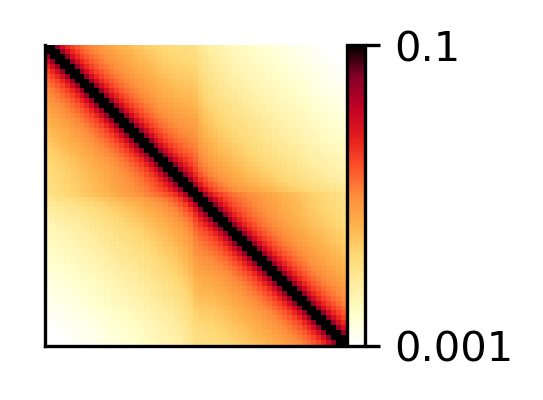

In [3]:
!plotpup.py --output local_CTCF_pileup_nonorm.png \
    --cmap fall --vmax 0.1 --vmin 0.001 \
    --input_pups local_CTCF_pileup_nonorm.clpy \
    --no_score --height 1.5

Image('local_CTCF_pileup_nonorm.png')

## Pileups by strand
Now let's split the pileup in two, based on the strands of CTCF sites. There is a simple "preset" for that, you simply need to add `--by_strand` argument.

In [4]:
!coolpup.py test.mcool::resolutions/10000 test_CTCF.bed.gz \
    --features_format bed --local --by_strand --nshifts 0 \
    --ignore_diags 0 --view hg38_arms.bed --flank 300000 \
    --outname local_CTCF_pileup_bystrand_nonorm.clpy --nproc 2

INFO:root:Namespace(by_chroms=False, by_distance=False, by_strand=True, by_window=False, clr_weight_name='weight', cool_path='test.mcool::resolutions/10000', coverage_norm=False, excl_chrs='chrY,chrM', expected=None, features='test_CTCF.bed.gz', features_format='bed', flank=300000, flip_negative_strand=False, ignore_diags=0, incl_chrs='all', local=True, logLevel='INFO', maxdist=None, maxshift=1000000, mindist=None, minshift=100000, n_proc=2, nshifts=0, ooe=True, outname='local_CTCF_pileup_bystrand_nonorm.clpy', post_mortem=False, rescale=False, rescale_flank=1.0, rescale_size=99, seed=None, store_stripes=False, subset=0, trans=False, view='hg38_arms.bed')
INFO:root:('chr2_p', 'chr2_p'): 1381
INFO:root:('chr17_p', 'chr17_p'): 548
INFO:root:('chr17_q', 'chr17_q'): 1602
INFO:root:('chr2_q', 'chr2_q'): 2221
INFO:root:Total number of piled up windows: 5752
/gpfs/igmmfs01/eddie/wendy-lab/elias/coolpuppy_trans/coolpuppy/coolpuppy/coolpup.py:50: PerformanceWarning: 
your performance may suffer

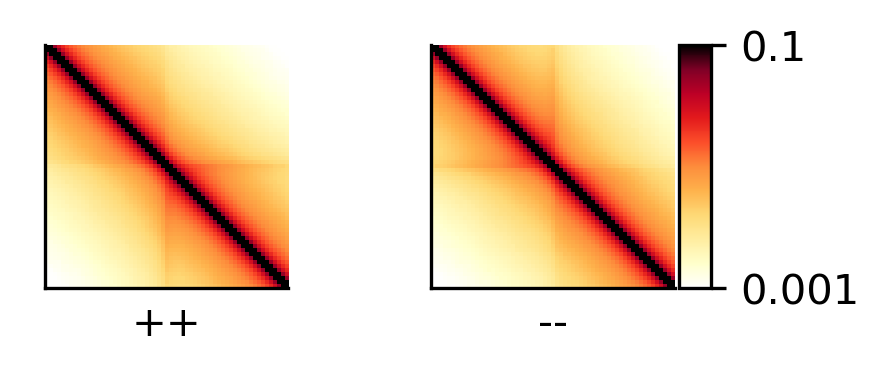

In [5]:
!plotpup.py --cols orientation --output local_CTCF_pileup_bystrand_nonorm.png \
    --cmap fall --vmax 0.1 --vmin 0.001 \
    --input_pups local_CTCF_pileup_bystrand_nonorm.clpy \
    --no_score --height 1.5

Image('local_CTCF_pileup_bystrand_nonorm.png')

## Normalization to background interaction level
### Random shifts
Now let's repeat the above, but also normalize the pileups to the decay of contact probability with separation. You can either use the randomly shifted control regions (here) or a global expected level of interactions calculated for the whole chromosome arm (see below).

In [6]:
!coolpup.py test.mcool::resolutions/10000 test_CTCF.bed.gz \
    --features_format bed --local --by_strand --nshifts 1 \
    --ignore_diags 0 --view hg38_arms.bed --pad 300000 \
    --outname local_CTCF_pileup_bystrand_1shift.clpy --nproc 2

INFO:root:Namespace(by_chroms=False, by_distance=False, by_strand=True, by_window=False, clr_weight_name='weight', cool_path='test.mcool::resolutions/10000', coverage_norm=False, excl_chrs='chrY,chrM', expected=None, features='test_CTCF.bed.gz', features_format='bed', flank=300000, flip_negative_strand=False, ignore_diags=0, incl_chrs='all', local=True, logLevel='INFO', maxdist=None, maxshift=1000000, mindist=None, minshift=100000, n_proc=2, nshifts=1, ooe=True, outname='local_CTCF_pileup_bystrand_1shift.clpy', post_mortem=False, rescale=False, rescale_flank=1.0, rescale_size=99, seed=None, store_stripes=False, subset=0, trans=False, view='hg38_arms.bed')
INFO:root:('chr2_p', 'chr2_p'): 1381
INFO:root:('chr17_p', 'chr17_p'): 548
INFO:root:('chr2_q', 'chr2_q'): 2221
INFO:root:('chr17_q', 'chr17_q'): 1602
INFO:root:Total number of piled up windows: 5752
/gpfs/igmmfs01/eddie/wendy-lab/elias/coolpuppy_trans/coolpuppy/coolpuppy/coolpup.py:50: PerformanceWarning: 
your performance may suffer

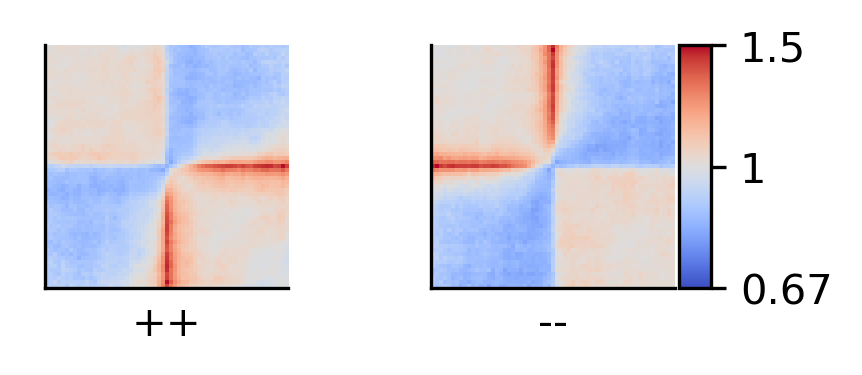

In [7]:
!plotpup.py --cols orientation \
    --output local_CTCF_pileup_bystrand_1shift.png \
    --input_pups local_CTCF_pileup_bystrand_1shift.clpy \
    --no_score --height 1.5
Image('local_CTCF_pileup_bystrand_1shift.png')

Instead of splitting two strands into two separate pileups, one can also flip the features on the negative strand. This way a single pileup is created where all features face in the same direction (as if they were on the positive strand).

### Chromosome arm-wide expected normalization
While we computed the expected using cooltools python API in the API notebook, here is the CLI version of the same process, with 2 cores.

In [8]:
!cooltools expected-cis --view hg38_arms.bed -p 2 -o test_expected_cis.tsv test.mcool::resolutions/10000

This is a little faster than using random shifts, and in most cases results are very similar. Therefore when a cooler file is used multiple times, it's beneficial to use this approach.

In [9]:
!coolpup.py test.mcool::resolutions/10000 test_CTCF.bed.gz \
    --features_format bed --local --by_strand --expected test_expected_cis.tsv \
    --ignore_diags 0 --view hg38_arms.bed --flank 300000 \
    --outname local_CTCF_pileup_bystrand_expected.clpy --nproc 2

INFO:root:Namespace(by_chroms=False, by_distance=False, by_strand=True, by_window=False, clr_weight_name='weight', cool_path='test.mcool::resolutions/10000', coverage_norm=False, excl_chrs='chrY,chrM', expected=('test_expected_cis.tsv', 'balanced.avg'), features='test_CTCF.bed.gz', features_format='bed', flank=300000, flip_negative_strand=False, ignore_diags=0, incl_chrs='all', local=True, logLevel='INFO', maxdist=None, maxshift=1000000, mindist=None, minshift=100000, n_proc=2, nshifts=10, ooe=True, outname='local_CTCF_pileup_bystrand_expected.clpy', post_mortem=False, rescale=False, rescale_flank=1.0, rescale_size=99, seed=None, store_stripes=False, subset=0, trans=False, view='hg38_arms.bed')
/gpfs/igmmfs01/eddie/wendy-lab/elias/coolpuppy_trans/coolpuppy/coolpuppy/CLI.py:488: UserWarning: Can't do both expected and control shifts; defaulting to expected
  PU = PileUpper(
INFO:root:('chr2_p', 'chr2_p'): 1381
INFO:root:('chr17_p', 'chr17_p'): 548
INFO:root:('chr2_q', 'chr2_q'): 2221
IN

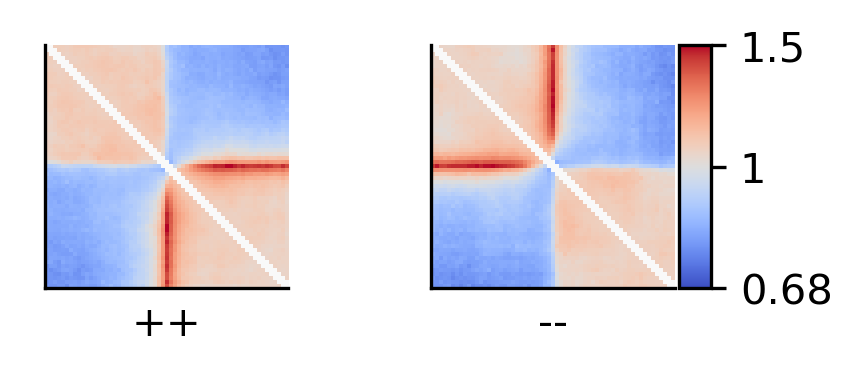

In [10]:
!plotpup.py --cols orientation \
    --output local_CTCF_pileup_bystrand_expected.png \
    --input_pups local_CTCF_pileup_bystrand_expected.clpy \
    --no_score --height 1.5

Image('local_CTCF_pileup_bystrand_expected.png')

In [11]:
!coolpup.py test.mcool::resolutions/10000 test_CTCF.bed.gz \
    --features_format bed --local --expected test_expected_cis.tsv \
    --flip_negative_strand --ignore_diags 0 --view hg38_arms.bed --flank 300000 \
    --outname local_CTCF_pileup_flipped_expected.clpy --nproc 2

INFO:root:Namespace(by_chroms=False, by_distance=False, by_strand=False, by_window=False, clr_weight_name='weight', cool_path='test.mcool::resolutions/10000', coverage_norm=False, excl_chrs='chrY,chrM', expected=('test_expected_cis.tsv', 'balanced.avg'), features='test_CTCF.bed.gz', features_format='bed', flank=300000, flip_negative_strand=True, ignore_diags=0, incl_chrs='all', local=True, logLevel='INFO', maxdist=None, maxshift=1000000, mindist=None, minshift=100000, n_proc=2, nshifts=10, ooe=True, outname='local_CTCF_pileup_flipped_expected.clpy', post_mortem=False, rescale=False, rescale_flank=1.0, rescale_size=99, seed=None, store_stripes=False, subset=0, trans=False, view='hg38_arms.bed')
/gpfs/igmmfs01/eddie/wendy-lab/elias/coolpuppy_trans/coolpuppy/coolpuppy/CLI.py:488: UserWarning: Can't do both expected and control shifts; defaulting to expected
  PU = PileUpper(
INFO:root:('chr2_p', 'chr2_p'): 1381
INFO:root:('chr17_p', 'chr17_p'): 548
INFO:root:('chr2_q', 'chr2_q'): 2221
INF

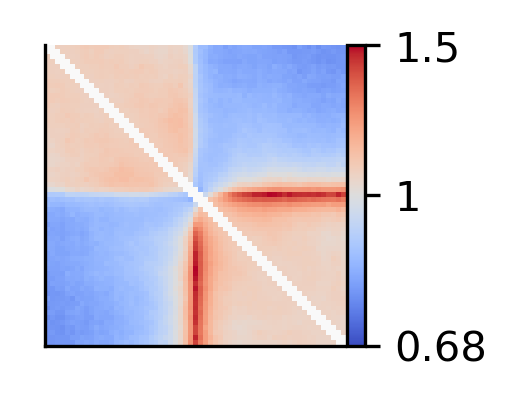

In [12]:
!plotpup.py \
    --output local_CTCF_pileup_flipped_expected.png \
    --input_pups local_CTCF_pileup_flipped_expected.clpy \
    --no_score --height 1.5

Image('local_CTCF_pileup_flipped_expected.png')

## By-distance pileups
Now we can add another layer of complexity: look at distal interactions betwwen CTCF sites, and split all snippets by their distance.
We use the file that we saved in the python API notebook that contains the annotation of site strength. `coolpup.py` can accept the coordinate input from stdin, so we can filter that file on the fly using awk, and this way we can use only the strong CTCF sites.

In [13]:
# This command will take a bit longer to run, since it's averaging over a much larger number of snippets
!cat annotated_ctcf_sites.tsv | awk -F'\t' '($11 == "Top by both scores")' | coolpup.py test.mcool::resolutions/10000 - \
    --features_format bed --by_distance --by_strand --expected test_expected_cis.tsv \
    --ignore_diags 0 --view hg38_arms.bed --flank 300000 --mindist 100000 --maxdist 102400000 \
    --outname bydistance_CTCF_pileup_bystrand_expected.clpy --nproc 2

INFO:root:Namespace(by_chroms=False, by_distance=True, by_strand=True, by_window=False, clr_weight_name='weight', cool_path='test.mcool::resolutions/10000', coverage_norm=False, excl_chrs='chrY,chrM', expected=('test_expected_cis.tsv', 'balanced.avg'), features='-', features_format='bed', flank=300000, flip_negative_strand=False, ignore_diags=0, incl_chrs='all', local=False, logLevel='INFO', maxdist=102400000, maxshift=1000000, mindist=100000, minshift=100000, n_proc=2, nshifts=10, ooe=True, outname='bydistance_CTCF_pileup_bystrand_expected.clpy', post_mortem=False, rescale=False, rescale_flank=1.0, rescale_size=99, seed=None, store_stripes=False, subset=0, trans=False, view='hg38_arms.bed')
/gpfs/igmmfs01/eddie/wendy-lab/elias/coolpuppy_trans/coolpuppy/coolpuppy/CLI.py:488: UserWarning: Can't do both expected and control shifts; defaulting to expected
  PU = PileUpper(
INFO:root:('chr2_p', 'chr2_p'): 10250
INFO:root:('chr17_p', 'chr17_p'): 2959
INFO:root:('chr2_q', 'chr2_q'): 15938
IN

/exports/igmm/eddie/chr11/elias/anaconda/envs/coolpuppy_trans/lib/python3.8/site-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/exports/igmm/eddie/chr11/elias/anaconda/envs/coolpuppy_trans/lib/python3.8/site-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/exports/igmm/eddie/chr11/elias/anaconda/envs/coolpuppy_trans/lib/python3.8/site-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


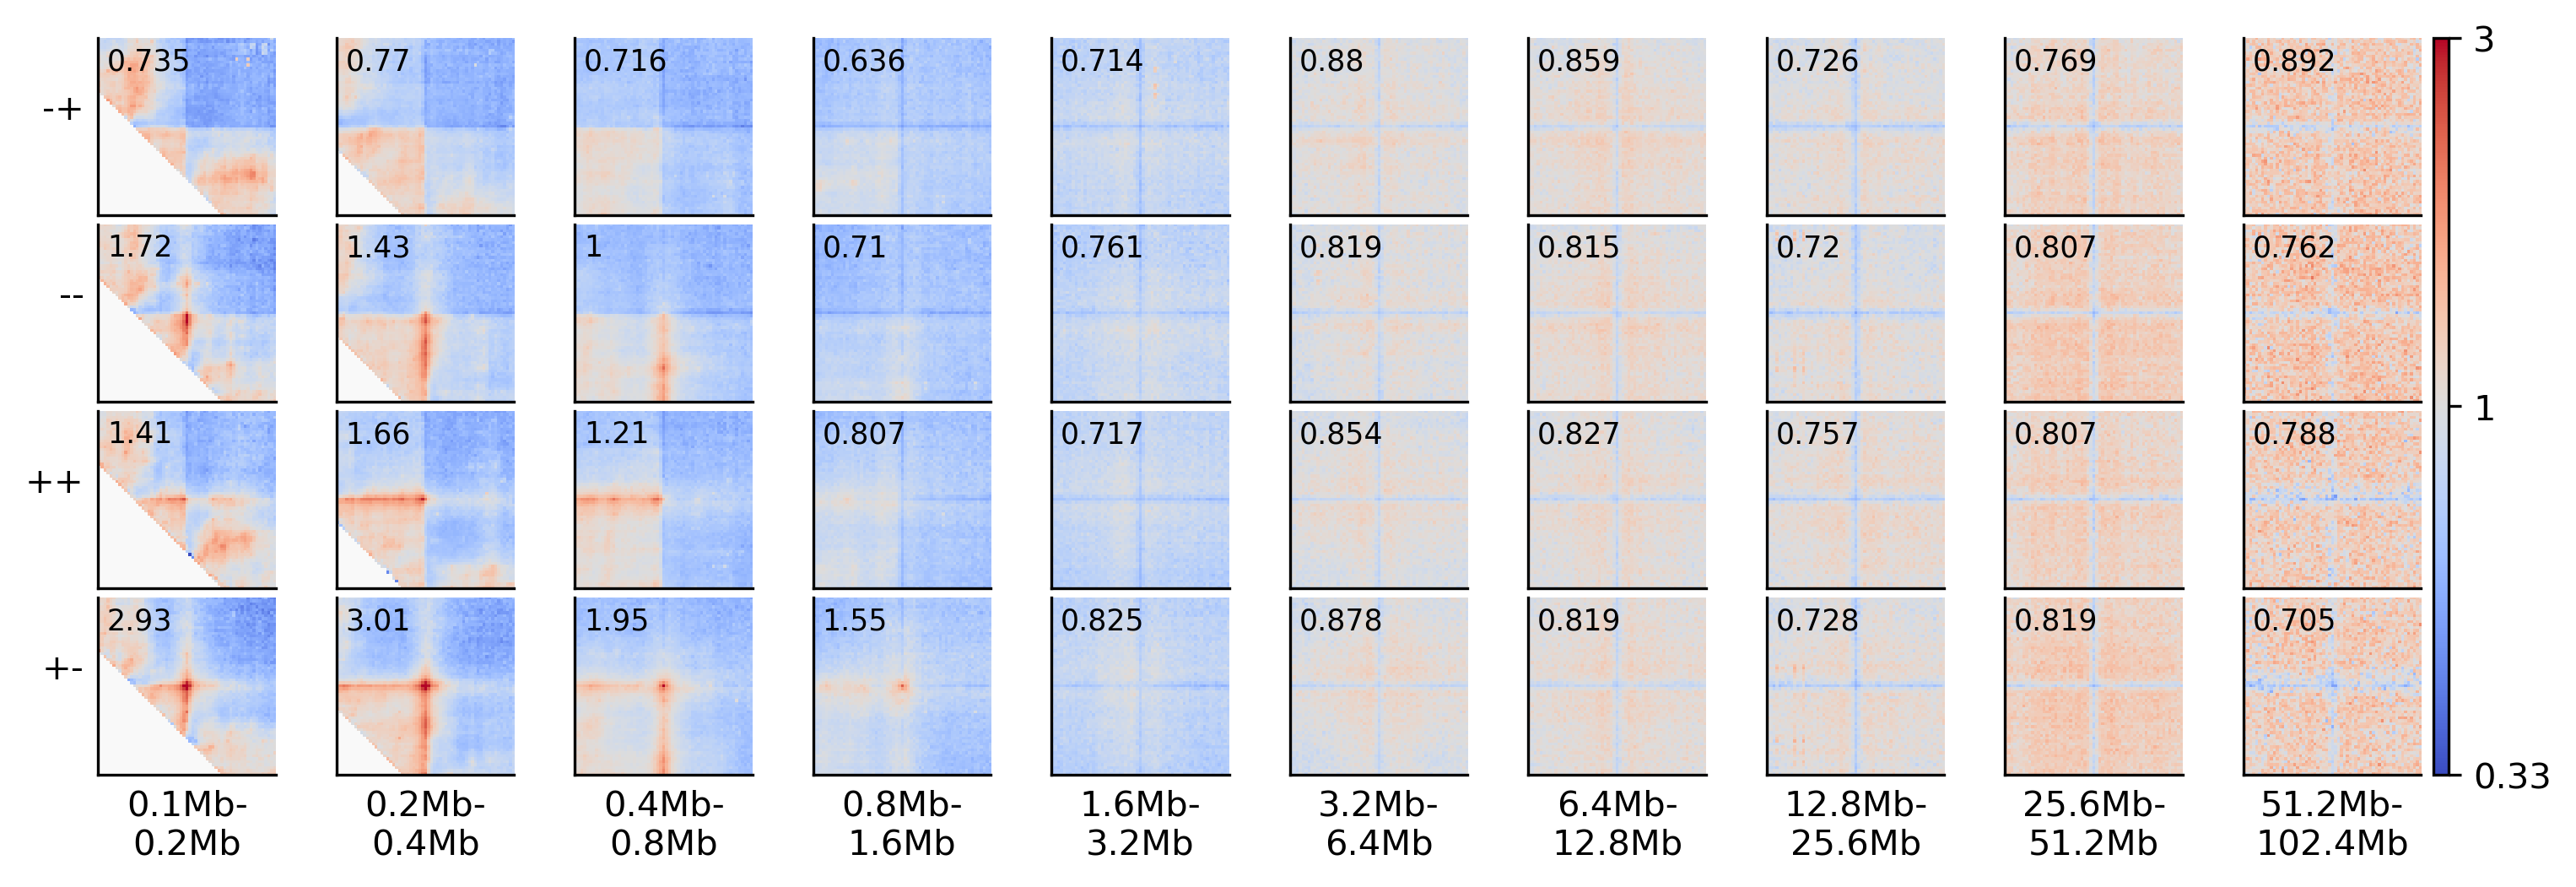

In [14]:
# "separation" is created when the pileups are created by distance, and plotpup.py
# always plots them in the order of increasing distance
# We need to specify the order of rows, otherise it's not guaranteed
!plotpup.py --cols separation \
    --rows orientation \
    --row_order "-+ -- ++ +-" \
    --vmax 3 \
    --output bydistance_CTCF_pileup_bystrand_expected.png \
    --input_pups bydistance_CTCF_pileup_bystrand_expected.clpy

Image('bydistance_CTCF_pileup_bystrand_expected.png')

Now we can also normalize each pileup to the average value in its top-left and bottom-right corners to remove the variation in background level of interactions

/exports/igmm/eddie/chr11/elias/anaconda/envs/coolpuppy_trans/lib/python3.8/site-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/exports/igmm/eddie/chr11/elias/anaconda/envs/coolpuppy_trans/lib/python3.8/site-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/exports/igmm/eddie/chr11/elias/anaconda/envs/coolpuppy_trans/lib/python3.8/site-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


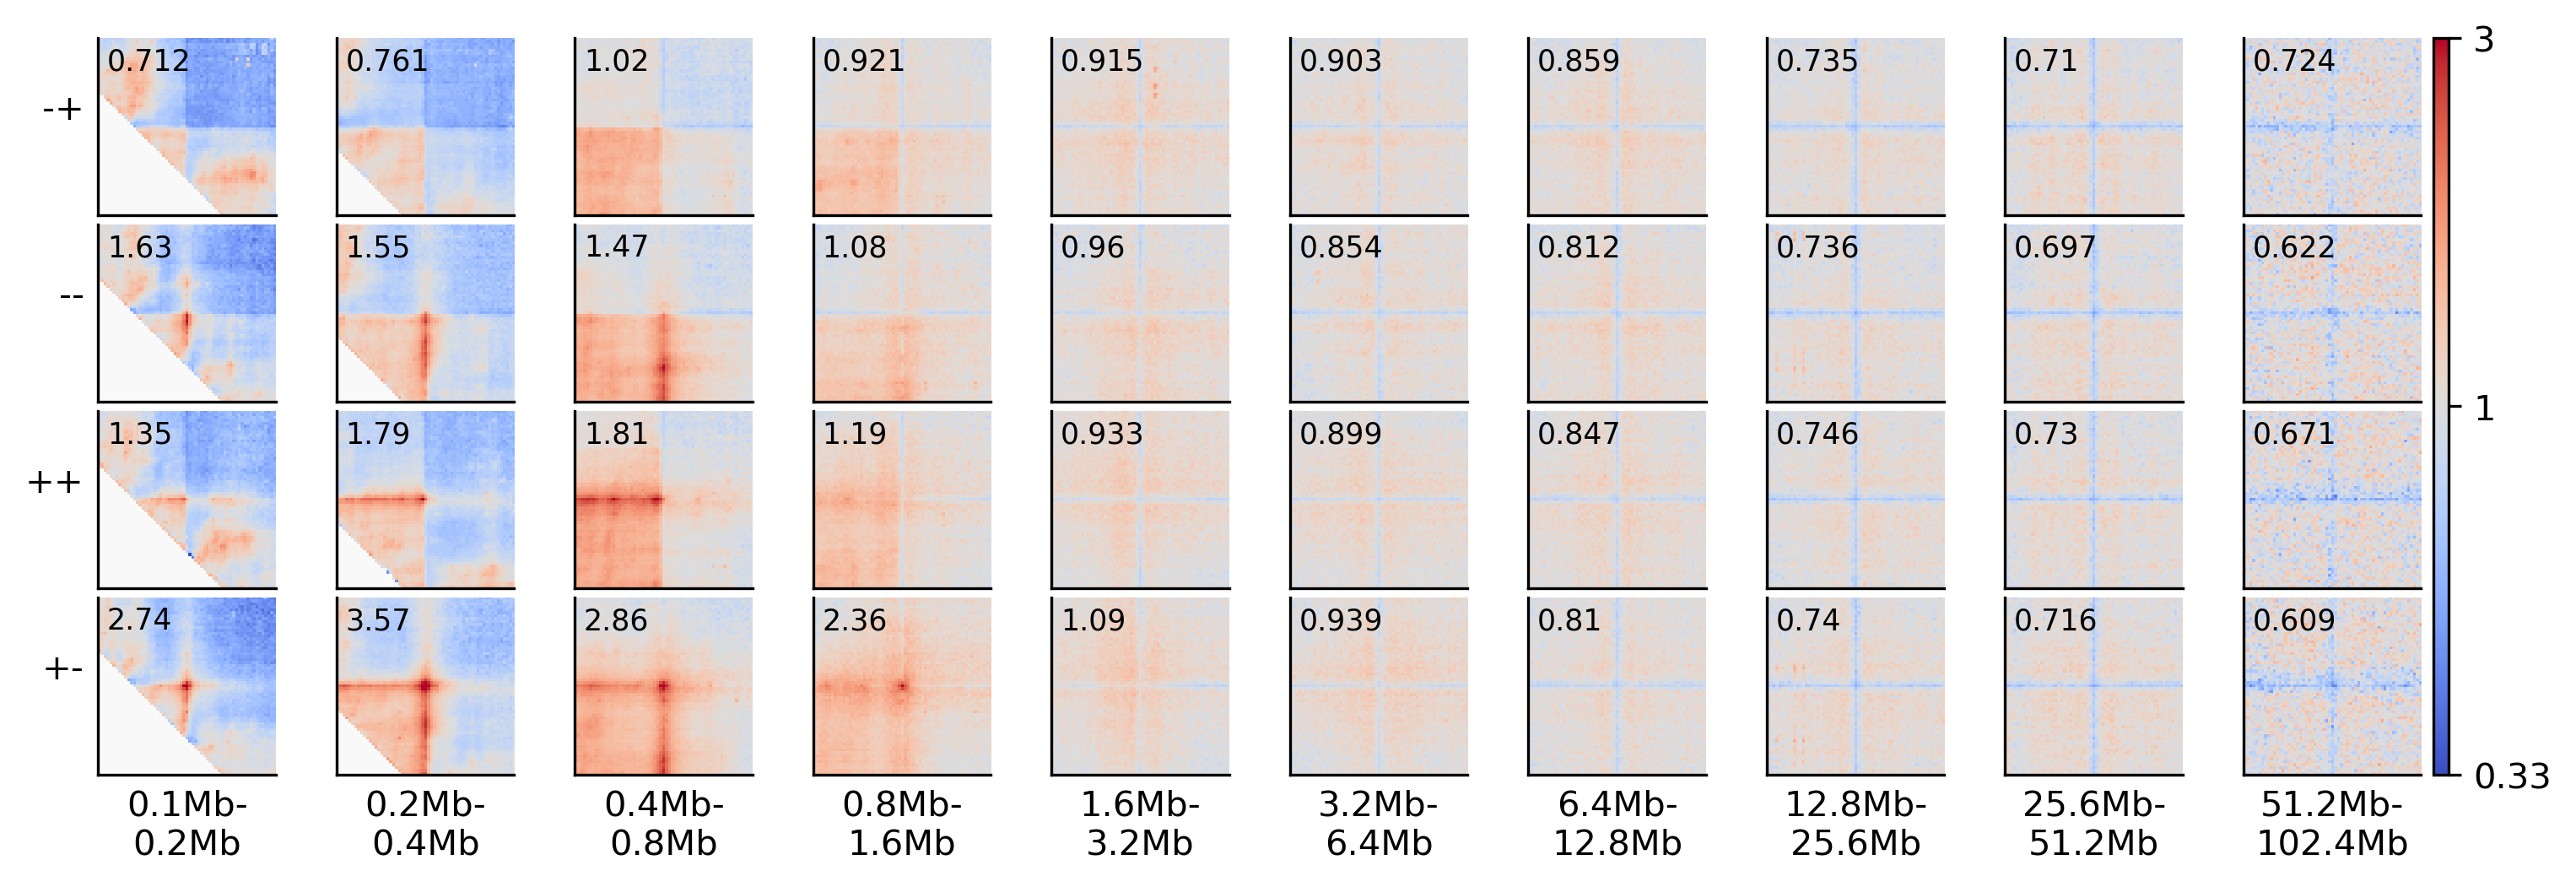

In [15]:
!plotpup.py --cols separation --rows orientation --vmax 3 --norm_corners 10 \
    --row_order "-+ -- ++ +-"\
    --output bydistance_CTCF_pileup_bystrand_expected_corner_norm.png \
    --input_pups bydistance_CTCF_pileup_bystrand_expected.clpy

Image('bydistance_CTCF_pileup_bystrand_expected_corner_norm.png')